<a href="https://colab.research.google.com/github/Subhas-1130/Subhas-demo/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
!pip install ucimlrepo

SVM classifier (Linear, Polynomial, Gaussian, & Sigmoid) using wine dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
#print(wine.metadata)

# variable information
#print(wine.variables)


In [4]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
# Binarize labels for ROC (multiclass)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]


In [6]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

# Define class names based on unique values in y_test for the current dataset
class_names = [str(i) for i in np.unique(y_test)]

def evaluate_model(clf, X_test, y_test, classifier_name):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{classifier_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve and AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    else:
        try:
            y_score = clf.decision_function(X_test)
            if len(y_score.shape) == 1:
                y_score = np.vstack([-y_score, y_score]).T
        except:
            y_score = None

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        plt.figure(figsize=(8,6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {classifier_name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("ROC curve not available.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM (linear) Results:
Accuracy: 0.9630
Precision: 0.9639
Recall: 0.9630
F1-Score: 0.9629


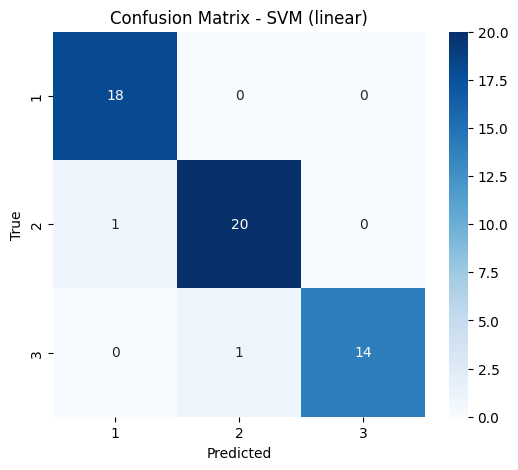

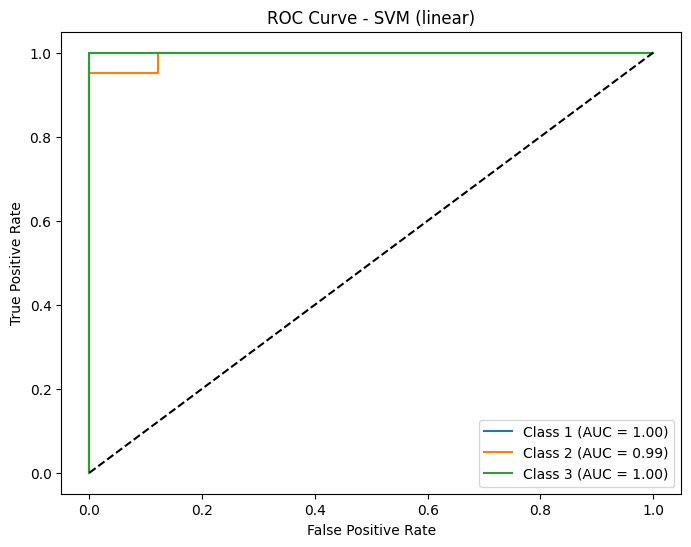


SVM (poly) Results:
Accuracy: 0.9444
Precision: 0.9514
Recall: 0.9444
F1-Score: 0.9447


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


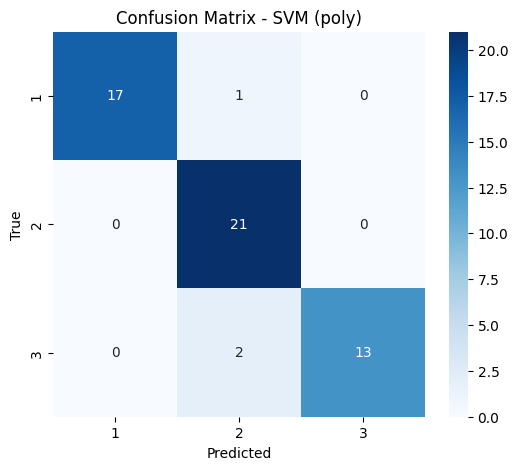

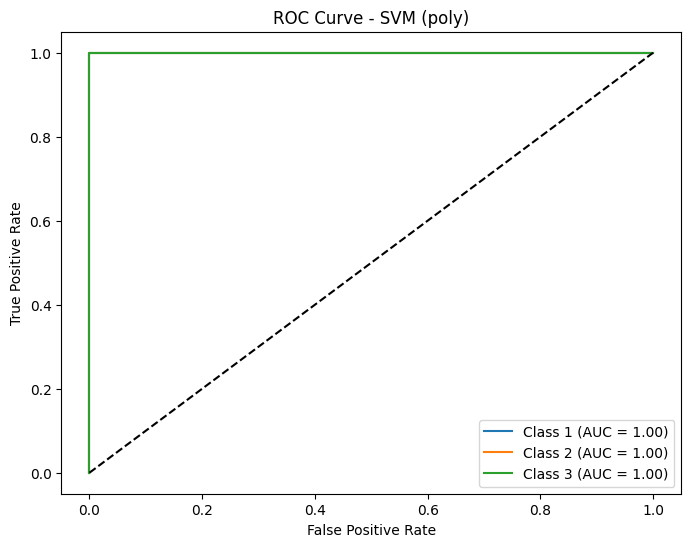

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM (rbf) Results:
Accuracy: 0.9815
Precision: 0.9823
Recall: 0.9815
F1-Score: 0.9814


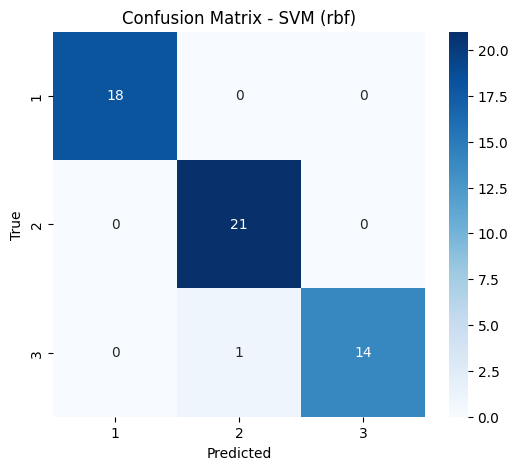

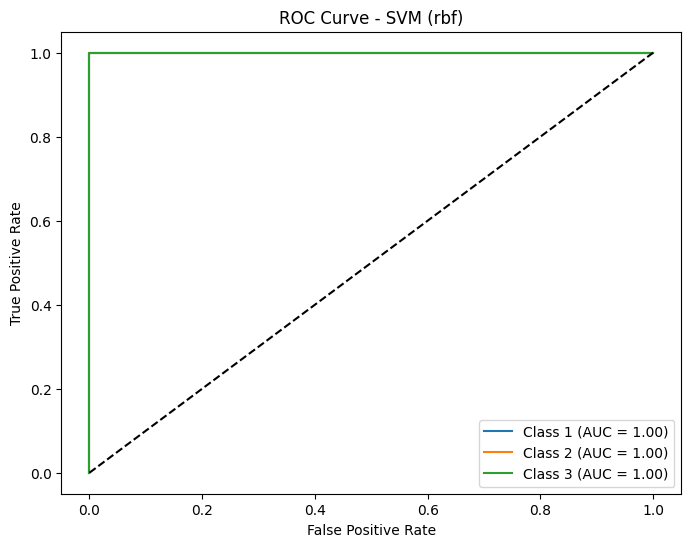


SVM (sigmoid) Results:
Accuracy: 0.9630
Precision: 0.9651
Recall: 0.9630
F1-Score: 0.9626


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


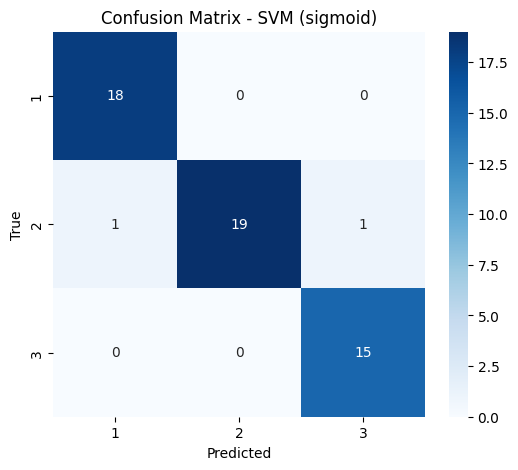

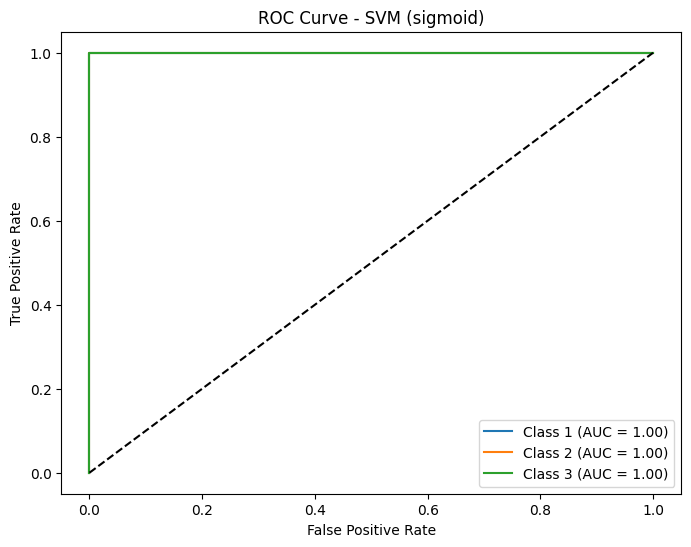

In [8]:
# Kernel types to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_clf = SVC(kernel=kernel, probability=True, random_state=42)
    svm_clf.fit(X_train, y_train)
    evaluate_model(svm_clf, X_test, y_test, f"SVM ({kernel})")

MLP classifier (Momentum term, Epoch size and learning rate) using wine dataset

In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Binarize for ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



MLP Classifier Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


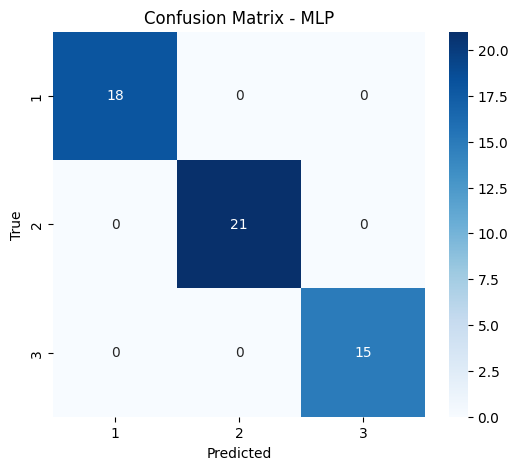

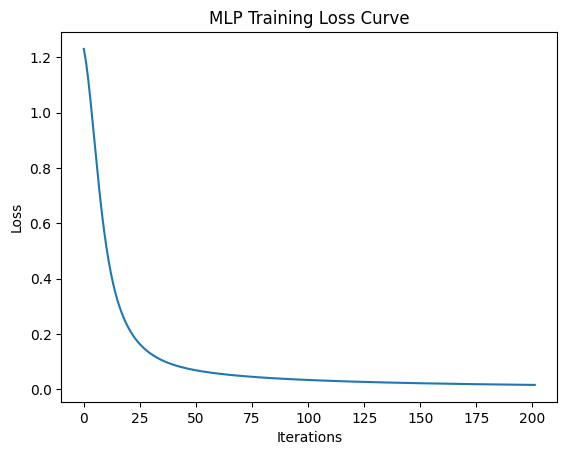

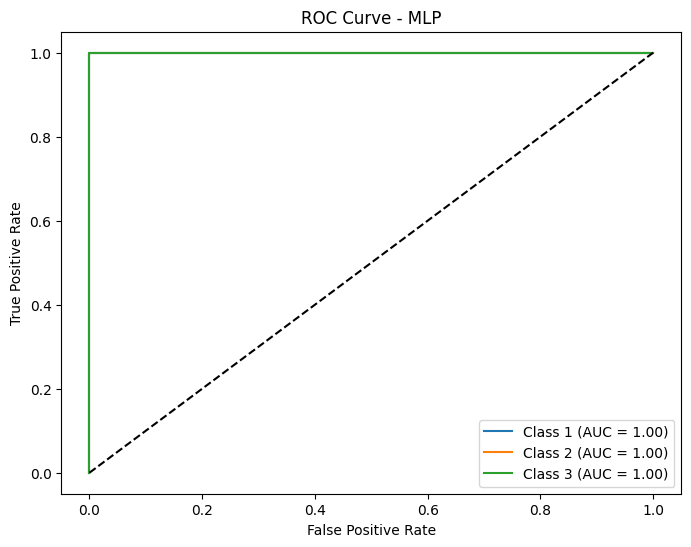

In [9]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

# Define MLP with momentum, epochs, learning rate
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='sgd', momentum=0.9, learning_rate_init=0.01,
                    max_iter=300, random_state=42, verbose=False)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\nMLP Classifier Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training loss curve
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# ROC and AUC
if hasattr(mlp, "predict_proba"):
    y_score = mlp.predict_proba(X_test)
else:
    y_score = None

if y_score is not None:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - MLP')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not available.")

Random Forest classifier using wine dataset

In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Binarize for ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classifier Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


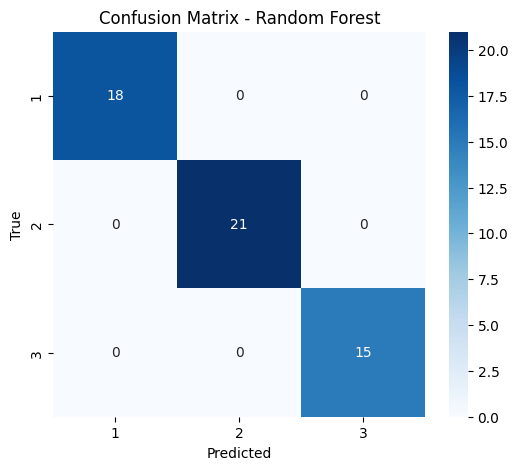

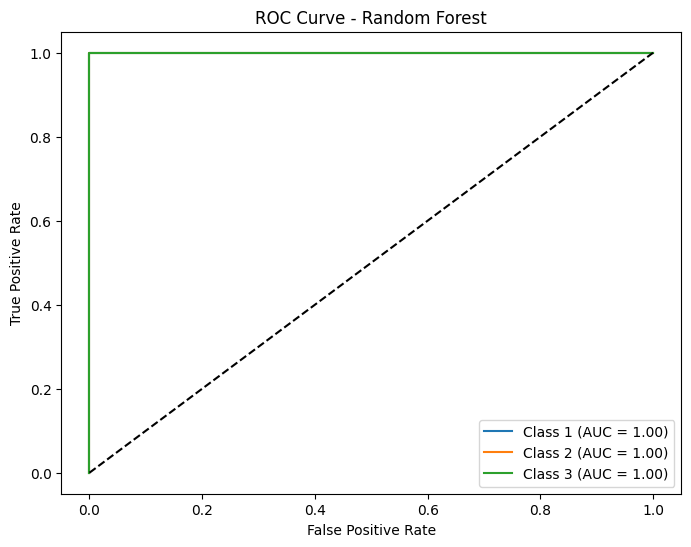

In [10]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

# Define Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC and AUC
if hasattr(rf, "predict_proba"):
    y_score = rf.predict_proba(X_test)
else:
    y_score = None

if y_score is not None:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not available.")

SVM classifier (Linear, Polynomial, Gaussian, & Sigmoid) using Handwritten Digit Dataset:

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
#print(optical_recognition_of_handwritten_digits.metadata)

# variable information
#print(optical_recognition_of_handwritten_digits.variables)


In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Binarize labels for ROC (multiclass)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]


In [ ]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

def evaluate_model(clf, X_test, y_test, classifier_name):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{classifier_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve and AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    else:
        try:
            y_score = clf.decision_function(X_test)
            if len(y_score.shape) == 1:
                y_score = np.vstack([-y_score, y_score]).T
        except:
            y_score = None

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        plt.figure(figsize=(8,6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {classifier_name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("ROC curve not available.")

In [ ]:
# Kernel types to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_clf = SVC(kernel=kernel, probability=True, random_state=42)
    svm_clf.fit(X_train, y_train)
    evaluate_model(svm_clf, X_test, y_test, f"SVM ({kernel})")


In [ ]:
# Define class names based on unique values in y_test for the current dataset
class_names = [str(i) for i in np.unique(y_test)]

MLP classifier (Momentum term, Epoch size and learning rate)using Handwritten Digit Dataset

In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Binarize for ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



MLP Classifier Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


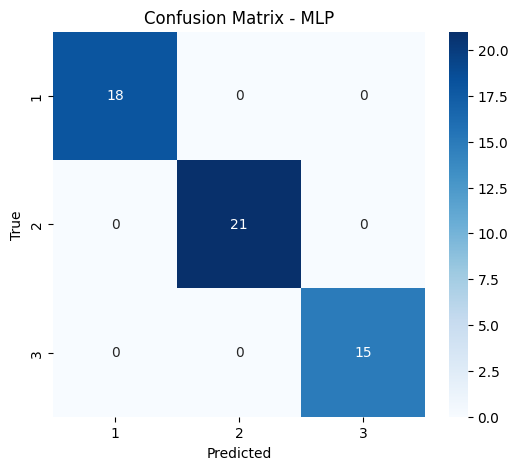

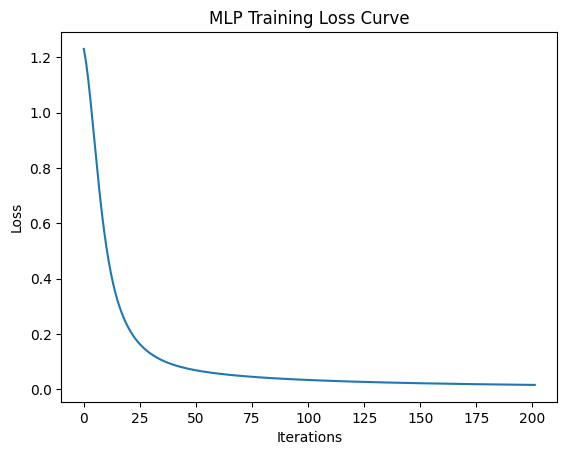

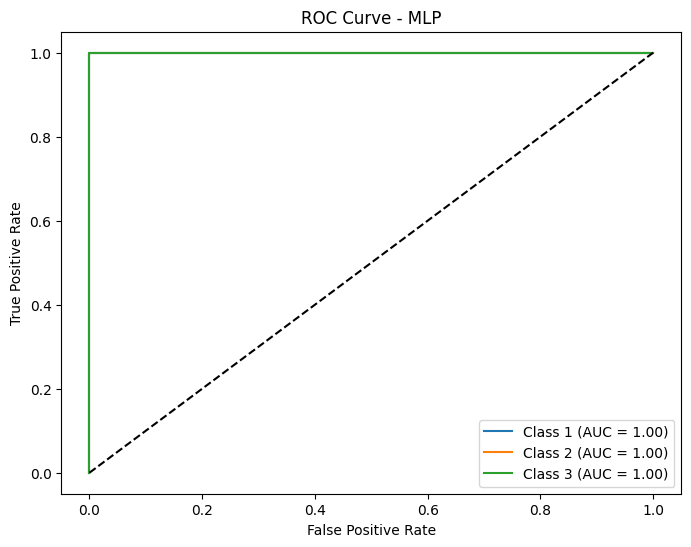

In [11]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

# Define MLP with momentum, epochs, learning rate
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='sgd', momentum=0.9, learning_rate_init=0.01,
                    max_iter=300, random_state=42, verbose=False)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\nMLP Classifier Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training loss curve
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# ROC and AUC
if hasattr(mlp, "predict_proba"):
    y_score = mlp.predict_proba(X_test)
else:
    y_score = None

if y_score is not None:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - MLP')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not available.")

Random Forest classifier using Handwritten Digit Dataset

In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Binarize for ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Classifier Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


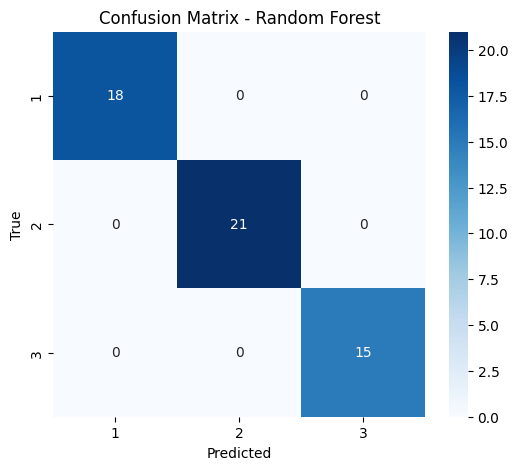

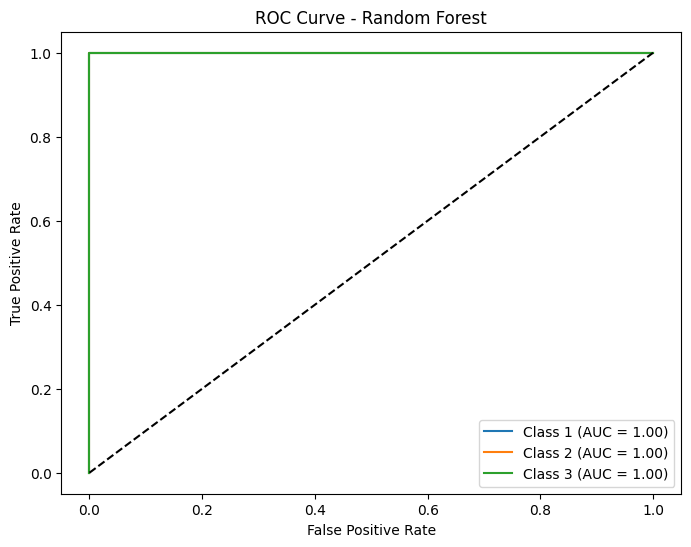

In [12]:
# Train-test split
train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

# Define Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC and AUC
if hasattr(rf, "predict_proba"):
    y_score = rf.predict_proba(X_test)
else:
    y_score = None

if y_score is not None:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not available.")